In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
import time
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler
#Implementing Standard Scalar
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#All 4 files
#df_constPost = pd.read_csv('Anwar CSV_Const Post_EDA\Merged ConstPost Dataset.csv')

#1416 files ConstPost Dataset
#df_constPost = pd.read_csv('Merged 1416 ConstPost Dataset.csv')

#1416 Constant Speed Offset
df_constPost = pd.read_csv("/content/drive/MyDrive/Speed Offset Dataset/RandomSpeedOffset_final.csv")
#df_constPost = pd.read_csv("/content/drive/MyDrive/Speed Offset Dataset/ConstantSpeedOffset_final.csv")
print(df_constPost.shape)

(820097, 34)


In [ ]:
# df_train.head()

In [ ]:
# df_test.head()

In [ ]:
df_constPost['attack?'].value_counts()

0    572039
1    248058
Name: attack?, dtype: int64

In [ ]:
df_constPost.columns

Index(['type', 'rcvTime', 'sendTime', 'sender', 'senderPseudo', 'messageID',
       'file_name', 'density_level', 'pos_x', 'pos_y', 'pos_z', 'pos_noise_x',
       'pos_noise_y', 'pos_noise_z', 'spd_x', 'spd_y', 'spd_z', 'spd_noise_x',
       'spd_noise_y', 'spd_noise_z', 'acl_x', 'acl_y', 'acl_z', 'acl_noise_x',
       'acl_noise_y', 'acl_noise_z', 'hed_x', 'hed_y', 'hed_z', 'hed_noise_x',
       'hed_noise_y', 'hed_noise_z', 'attack?', 'receiver_id'],
      dtype='object')

In [ ]:
#Version 1: All features
# df_constPost.drop(['type','file_name','pos_z','pos_noise_z','spd_z','spd_noise_z',
#                   'acl_z','acl_noise_z','hed_z','hed_noise_z',
#                   'pos_noise_x','pos_noise_y','spd_noise_x','spd_noise_y','acl_noise_x','acl_noise_y',
#                  'hed_noise_x','hed_noise_y','density_level'],axis=1,inplace=True)

#Version 2 (Without RcvTime, SendTime, RcvID, SenderID, SendPseudo, MessageID)
df_constPost.drop(['type','file_name','pos_z','pos_noise_z','spd_z','spd_noise_z',
                  'acl_z','acl_noise_z','hed_z','hed_noise_z',
                  'pos_noise_x','pos_noise_y','spd_noise_x','spd_noise_y','acl_noise_x','acl_noise_y',
                 'hed_noise_x','hed_noise_y','density_level', 
                  'rcvTime', 'sendTime', 'sender', 'senderPseudo', 'messageID','receiver_id'],axis=1,inplace=True)

#Version 3 (Without SendTime, RcvID, SenderID, SendPseudo, MessageID) [Diff. between V2 and 3 is RcvTime]
# df_constPost.drop(['type','file_name','pos_z','pos_noise_z','spd_z','spd_noise_z',
#                   'acl_z','acl_noise_z','hed_z','hed_noise_z',
#                   'pos_noise_x','pos_noise_y','spd_noise_x','spd_noise_y','acl_noise_x','acl_noise_y',
#                  'hed_noise_x','hed_noise_y','density_level', 
#                               'sendTime', 'sender', 'senderPseudo', 'messageID','receiver_id'],axis=1,inplace=True)

In [ ]:
df_constPost.columns


Index(['pos_x', 'pos_y', 'spd_x', 'spd_y', 'acl_x', 'acl_y', 'hed_x', 'hed_y',
       'attack?'],
      dtype='object')

In [ ]:

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
#X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
X = df_constPost[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime', 'sendTime', 'receiver_id', 'sender','senderPseudo','messageID']]
y = df_constPost['attack?']
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))


KeyError: ignored

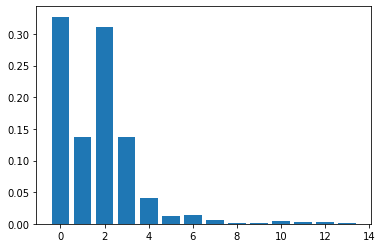

In [ ]:
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
#Feature imporance final graph
#from matplotlib import pyplot as plt

#attack_bar = ["spd_x", "spd_y", "hed_x","hed_y", "rcvTime", "pos_x","pos_y", "acl_x", "acl_y","sender_ID", "senderPseudo", "messageID"]
#values_bar = [0.32830, 0.13694, 0.31187, 0.13768, 0.00275, 0.04040, 0.01318, 0.01457, 0.00748, 0.00244, 0.00204, 0.00231]


#plt.bar(range(len(attack_bar)), values_bar)
#plt.xticks(range(len(attack_bar)), attack_bar, rotation='vertical')

#plt.xlabel("Features")
#plt.ylabel("Importance Score")
#plt.title("Feature Importance")
#plt.show()

In [ ]:
# getting number of rows
#Splitting

row_count = df_constPost.shape[0]
#print(row_count)

row_train = round(row_count*0.8)
row_test = round(row_count-row_train)

print(row_train)
print(row_test)

656078
164019


In [ ]:
df_train = df_constPost.head(row_train)
print(df_train.shape)

df_test = df_constPost.tail(row_test)
print(df_test.shape)

(656078, 9)
(164019, 9)


In [ ]:
df_train.head()

,pos_x,pos_y,spd_x,spd_y,acl_x,acl_y,hed_x,hed_y,attack?
0,281.598508,227.985744,21.561966,11.063350,1.397629,0.440547,0.955632,0.294564,1
1,246.848205,208.916319,-0.660606,4.562369,0.481677,-3.326281,-0.013848,0.999904,0
2,252.009715,220.671893,5.969055,5.170251,1.418740,1.228877,0.766271,0.642518,0
3,295.056717,232.219874,9.011551,12.678996,0.064229,0.020480,0.955513,0.294950,1
4,247.102954,212.827087,-0.052303,4.379601,-0.031026,2.599841,0.126969,0.991907,0


In [ ]:
df_test.head()

,pos_x,pos_y,spd_x,spd_y,acl_x,acl_y,hed_x,hed_y,attack?
656078,221.050154,384.137029,-0.210093,1.429165,-0.170244,1.146989,-0.094348,0.995539,0
656079,258.931878,135.505039,-1.810000,11.325726,0.110052,-0.687916,-0.085826,0.996310,0
656080,212.662345,413.384197,-1.689782,9.754113,-0.341464,1.970934,-0.069671,0.997570,0
656081,268.822265,73.423639,4.400621,18.189587,-0.016311,0.105228,-0.135919,0.990720,1
656082,230.435212,385.816438,10.639428,-3.009888,0.312261,-2.061091,0.082727,-0.996572,1


In [ ]:

#Train test split

#TRAINING

#Version 1
#X_train = df_train[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime', 'sendTime', 'receiver_id', 'sender','senderPseudo','messageID']]

#Version 2
X_train = df_train[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y']]

#Version 3
#X_train = df_train[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime']]

#Common for all 3
y_train = df_train['attack?']

#TESTING

#X_test = df_test[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime', 'sendTime', 'receiver_id', 'sender','senderPseudo','messageID']]

#Version 2
X_test = df_test[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y']]

#Version 3
#X_test = df_test[['spd_x', 'spd_y','hed_x','hed_y','pos_x', 'pos_y', 'acl_x','acl_y', 'rcvTime']]

#Common for all 3
y_test = df_test['attack?']

# print(y_test.value_counts())

In [ ]:

# from sklearn.datasets import make_classification
# from sklearn.tree import DecisionTreeClassifier
# from matplotlib import pyplot
# # define dataset
# #X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# # define the model
# model = DecisionTreeClassifier()
# # fit the model
# model.fit(X, y)
# # get importance
# importance = model.feature_importances_
# # summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# # plot feature importance
# plt.bar([x for x in range(len(importance))], importance)
# plt.show()

In [ ]:
# # #Splitting the data

# from sklearn.model_selection import train_test_split
# from sklearn.model_selection import cross_val_score

# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# # train, test = train_test_split (df_constPost, test_size=0.20, random_state=0)

# # train.shape, test.shape

# print('Attack test', y_test.value_counts())

In [ ]:
# Check the shape of splited data
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((656078, 8), (164019, 8), (656078,), (164019,))

In [ ]:
# data normalization with sklearn

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train = norm.transform(X_train)

# transform testing dataabs
X_test = norm.transform(X_test)

In [ ]:
#Implementing Standard Scalar

scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#XGBoost
import xgboost
from numpy import loadtxt
from xgboost import XGBClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

# fit model no training data
model_XG = XGBClassifier()
model_XG.fit(X_train, y_train)

#Time calc for train
start_time_train = time.time()
#Train Accuracy
y_train_xg = model_XG.predict(X_train)
print('Accuracy Train XG for :', accuracy_score(y_train, y_train_xg)*100)
end_time_train = time.time()
execution_time_train = end_time_train - start_time_train
print('Execution Time for train:', execution_time_train)

#Time calc for test
start_time_test = time.time()

#Test Accuracy
# make predictions for test data
y_pred_xg = model_XG.predict(X_test)

# evaluate predictions
print('Accuracy Test XG:', accuracy_score(y_test, y_pred_xg)*100)

#Evaluating the XG algorithm
print(confusion_matrix(y_test, y_pred_xg))
print(classification_report(y_test, y_pred_xg))

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for test:', execution_time_test)



Accuracy Train XG for : 97.85985812662518
Execution Time for train: 2.738114833831787
Accuracy Test XG: 97.61795889500607
[[115260     95]
 [  3812  44852]]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    115355
           1       1.00      0.92      0.96     48664

    accuracy                           0.98    164019
   macro avg       0.98      0.96      0.97    164019
weighted avg       0.98      0.98      0.98    164019

Execution Time for test: 0.9102604389190674


In [ ]:
#XGBoost score with Cross validation
start_time_test = time.time()

XG_Cross = cross_val_score(model_XG, X_train, y_train, cv = 5)
XG_Cross_mean = XG_Cross.mean()
print('Mean_Accuracy Kfold XG:', XG_Cross_mean*100)

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for XG Cross Val:', execution_time_test)

Mean_Accuracy Kfold XG: 97.57940210537235
Execution Time for XG Cross Val: 229.90235710144043


In [ ]:
#KNN score with Cross validation

def KNN_CrossVal(classifier, neighbors):
  start_time = time.time()

  kfold_Acc_Knn = cross_val_score(classifier, X_train, y_train, cv = 5)
  kfold_Acc_Knn_mean = kfold_Acc_Knn.mean()

  end_time = time.time()
  execution_time = end_time-start_time
  print('Mean_Accuracy Kfold KNN for neighbors:', neighbors, ":", kfold_Acc_Knn_mean*100)
  print('Execution Time for neighbors:', execution_time)

#KNN Training
from sklearn.neighbors import KNeighborsClassifier

n_neighbors_range =[3,7,9]

for neighbors in n_neighbors_range:

  classifier = KNeighborsClassifier(neighbors)
  classifier.fit(X_train, y_train)

  #Time calc for train
  start_time_train = time.time()
  #Train Accuracy
  y_train_knn = classifier.predict(X_train)
  print('Accuracy Train KNN for :', neighbors, ':', accuracy_score(y_train, y_train_knn)*100)
  end_time_train = time.time()
  execution_time_train = end_time_train - start_time_train
  print('Execution Time for train:', neighbors, ':', execution_time_train)


  #Time calc for test
  start_time_test = time.time()
  #Test Accuracy
  y_pred_knn = classifier.predict(X_test)
  print('Accuracy Test KNN:', neighbors, ':', accuracy_score(y_test, y_pred_knn)*100)

  #Evaluating the KNN algorithm
  print(confusion_matrix(y_test, y_pred_knn))
  print(classification_report(y_test, y_pred_knn))

  end_time_test = time.time()
  execution_time_test = end_time_test - start_time_test
  print('Execution Time for test:', neighbors, ':', execution_time_test)
  print("================================================================")
  KNN_CrossVal(classifier, neighbors)
  print("================================================================")





#Evaluating the KNN algorithm
# print(confusion_matrix(y_test, y_pred_knn))
# print(classification_report(y_test, y_pred_knn))

Accuracy Train KNN for : 3 : 99.85382835577477
Execution Time for train: 3 : 29.548100471496582
Accuracy Test KNN: 3 : 94.2750534998994
[[113086   2269]
 [  7121  41543]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    115355
           1       0.95      0.85      0.90     48664

    accuracy                           0.94    164019
   macro avg       0.94      0.92      0.93    164019
weighted avg       0.94      0.94      0.94    164019

Execution Time for test: 3 : 17.84135389328003
Mean_Accuracy Kfold KNN for neighbors: 3 : 98.05160043537639
Execution Time for neighbors: 66.27289152145386
Accuracy Train KNN for : 7 : 99.66055865308698
Execution Time for train: 7 : 34.604644536972046
Accuracy Test KNN: 7 : 94.24213048488285
[[113203   2152]
 [  7292  41372]]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    115355
           1       0.95      0.85      0.90     48664

    accura

In [ ]:
#KNN score with Cross validation

def KNN_CrossVal(classifier):
  start_time = time.time()

  kfold_Acc_Knn = cross_val_score(classifier, X_train, y_train, cv = 5)
  kfold_Acc_Knn_mean = kfold_Acc_Knn.mean()

  end_time = time.time()
  execution_time = end_time-start_time
  print('Mean_Accuracy Kfold KNN:', kfold_Acc_Knn_mean*100)
  print('Execution Time:', execution_time)




Mean_Accuracy Kfold KNN: 96.26248331332215
Execution Time: 102.18206000328064


In [ ]:
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import cohen_kappa_score

# auc_score = roc_auc_score(y_test, y_pred_knn)*100
# mcc = matthews_corrcoef(y_test, y_pred_knn)*100
# kappa = cohen_kappa_score(y_test, y_pred_knn)*100

# print('AUC_knn: ',auc_score)
# print('MCC_knn: ',mcc)
# print('KAPPA_knn: ',kappa)

In [ ]:
#Logistic Regression

LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(X_train, y_train)

#Train
start_time_train = time.time()
lr_pred_train = LR.predict(X_train)
print('Accuracy Logisitic Regression_Train:',accuracy_score(y_train, lr_pred_train)*100)
end_time_train = time.time()
execution_time_train = end_time_train - start_time_train
print('Execution Time for train:', execution_time_train)

#Test
start_time_test = time.time()
lr_pred = LR.predict(X_test)
print('Accuracy Logisitic Regression_test:',accuracy_score(y_test, lr_pred)*100)
#evaluating the algo
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))
end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for test:', execution_time_test)




# auc_score = roc_auc_score(y_test, lr_pred)*100
# mcc = matthews_corrcoef(y_test, lr_pred)*100
# kappa = cohen_kappa_score(y_test, lr_pred)*100

# print('AUC_lr: ',auc_score)
# print('MCC_lr: ',mcc)
# print('KAPPA_lr: ',kappa)

Accuracy Logisitic Regression_Train: 69.60818683144382
Execution Time for train: 0.30695199966430664
Accuracy Logisitic Regression_test: 70.33026661545308
[[115355      0]
 [ 48664      0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.70      1.00      0.83    115355
           1       0.00      0.00      0.00     48664

    accuracy                           0.70    164019
   macro avg       0.35      0.50      0.41    164019
weighted avg       0.49      0.70      0.58    164019

Execution Time for test: 0.7294249534606934


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#LR score with Cross validation
start_time_test = time.time()

LR_Acc_Knn = cross_val_score(LR, X_train, y_train, cv = 5)
LR_Acc_Knn_mean = LR_Acc_Knn.mean()
print('Mean_Accuracy Kfold LR:', LR_Acc_Knn_mean*100)

end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for LR:', execution_time_test)



Mean_Accuracy Kfold LR: 69.60818683171716
Execution Time for LR: 10.662532567977905


In [ ]:
#AdaBoost with Default DT classifier

from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
classifier_ada = AdaBoostClassifier(n_estimators=50, learning_rate=1)

# Train Adaboost Classifer
model = classifier_ada.fit(X_train, y_train)

#Predict the response for train dataset
start_time_train = time.time()
y_pred_ada_train = model.predict(X_train)
print('Accuracy adaboost_train:',accuracy_score(y_train, y_pred_ada_train)*100)
end_time_train = time.time()
execution_time_train = end_time_train - start_time_train
print('Execution Time for train:', execution_time_train)

#Predict the response for test dataset
start_time_test = time.time()
y_pred_ada = model.predict(X_test)

print('Accuracy Results for AdaBoost')

print(confusion_matrix(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))
print('Accuracy adaboost_test:',accuracy_score(y_test, y_pred_ada)*100)
end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for test:', execution_time_test)


Accuracy adaboost_train: 86.6249135011386
Execution Time for train: 5.28184175491333
Accuracy Results for AdaBoost
[[110409   4946]
 [ 17875  30789]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91    115355
           1       0.86      0.63      0.73     48664

    accuracy                           0.86    164019
   macro avg       0.86      0.79      0.82    164019
weighted avg       0.86      0.86      0.85    164019

Accuracy adaboost_test: 86.08636804272676
Execution Time for test: 1.794931173324585


In [ ]:
# Model Accuracy ADAboost
# auc_score = roc_auc_score(y_test, y_pred_ada)*100
# mcc = matthews_corrcoef(y_test, y_pred_ada)*100
# kappa = cohen_kappa_score(y_test, y_pred_ada)*100

# print('AUC_ada: ',auc_score)
# print('MCC_ada: ',mcc)
# print('KAPPA_ada: ',kappa)

In [ ]:
#AdaBoost score with Cross validation
start_time_test = time.time()

Ada_Acc_Knn = cross_val_score(classifier_ada, X_train, y_train, cv = 5)
Ada_Acc_Knn_mean = Ada_Acc_Knn.mean()

print('Mean_Accuracy Kfold AdaBoost:', Ada_Acc_Knn_mean*100)
end_time_test = time.time()
execution_time_test = end_time_test - start_time_test
print('Execution Time for K-fold:', execution_time_test)

Mean_Accuracy Kfold AdaBoost: 86.68953706228223
Execution Time for K-fold: 243.41009616851807


In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
print(clf.tree_.max_depth)

40


In [ ]:
 #Decisiontree (Normal)
from sklearn.metrics import mean_squared_error
#import time
#training accuracy


# List of values to try for max_depth:
#max_depth_range = [3,6,10,15,20,25,30,40,50,70]
max_depth_range = [40]

for depth in max_depth_range:

  classifierdt = DecisionTreeClassifier(max_depth = depth, random_state=0)
  classifierdt.fit(X_train, y_train)

  #Train
  start_time_train = time.time()
  y_pred_dt_train = classifierdt.predict(X_train)
  print('Accuracy Decision tree_train:', depth, ':',accuracy_score(y_train, y_pred_dt_train)*100)
  #Train error or Mean squared error
  training_error = mean_squared_error(y_train, y_pred_dt_train)
  print('Training error:', depth, ':',training_error*100,'%')

  end_time_train = time.time()
  execution_time_train = end_time_train - start_time_train
  print('Execution Time for train:', depth, ':',execution_time_train)

  #Test
  start_time_test = time.time()
  y_pred_dt = classifierdt.predict(X_test)
  print('Accuracy Decision tree_test:', depth, ':',accuracy_score(y_test, y_pred_dt)*100)
  #Error
  testing_error = mean_squared_error(y_test, y_pred_dt)
  print('Testing error:', depth, ':',testing_error*100,'%')
  # #evaluating the algo
  from sklearn.metrics import classification_report, confusion_matrix
  print(confusion_matrix(y_test, y_pred_dt))
  print(classification_report(y_test, y_pred_dt))
  end_time_test = time.time()
  execution_time_test = end_time_test - start_time_test
  print('Execution Time for test:', depth, ':', execution_time_test)
  print()


# auc_score = roc_auc_score(y_test, y_pred_dt)*100
# mcc = matthews_corrcoef(y_test, y_pred_dt)*100
# kappa = cohen_kappa_score(y_test, y_pred_dt)*100

# print('AUC_dt: ',auc_score)
# print('MCC_dt: ',mcc)
# print('KAPPA_dt: ',kappa)

Accuracy Decision tree_train: 40 : 99.83660479394219
Training error: 40 : 0.1633952060578163 %
Execution Time for train: 40 : 0.17619657516479492
Accuracy Decision tree_test: 40 : 98.34958145092946
Testing error: 40 : 1.6504185490705345 %
[[114337   1018]
 [  1689  46975]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    115355
           1       0.98      0.97      0.97     48664

    accuracy                           0.98    164019
   macro avg       0.98      0.98      0.98    164019
weighted avg       0.98      0.98      0.98    164019

Execution Time for test: 40 : 0.44834232330322266



In [ ]:
# Decision tree with range of Depth vals
# List of values to try for max_depth:
# max_depth_range = list(range(1, 7))
# # List to store the accuracy for each value of max_depth:
# depth_accuracy = []

# for depth in max_depth_range:
#   start_time = time.time()

#   classifierdt = DecisionTreeClassifier(max_depth = depth, random_state=0)
#   classifierdt.fit(X_train, y_train)

#   y_pred_dt = classifierdt.predict(X_test)
#   score = accuracy_score(y_test, y_pred_dt)*100
#   print('Accuracy Decision tree_test for depth:', depth, ':',score)
#   depth_accuracy.append(score)

#   testing_error = mean_squared_error(y_test, y_pred_dt)
#   print('Testing error for depth:', depth, ':', testing_error*100,'%')

#   end_time = time.time()
#   execution_time = end_time-start_time
#   print('Execution Time for depth:', depth, ':',execution_time)
#   print()
  
  # #training accuracy
  # y_pred_dt_train = classifierdt.predict(X_train)

In [ ]:

# Decision tree with cross validation
# function for fitting trees of various depths on the training data using cross-validation

# def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
#     cv_scores_list = []
#     cv_scores_std = []
#     cv_scores_mean = []
#     accuracy_scores = []
#     for depth in tree_depths:
#         tree_model = DecisionTreeClassifier(max_depth=depth)
#         cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
#         cv_scores_list.append(cv_scores)
#         cv_scores_mean.append(cv_scores.mean())
#         cv_scores_std.append(cv_scores.std())
#         accuracy_scores.append(tree_model.fit(X, y).score(X, y))
#     cv_scores_mean = np.array(cv_scores_mean)
#     cv_scores_std = np.array(cv_scores_std)
#     accuracy_scores = np.array(accuracy_scores)
#     return cv_scores_mean, cv_scores_std, accuracy_scores
  
# # function for plotting cross-validation results
# def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
#     fig, ax = plt.subplots(1,1, figsize=(15,5))
#     ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
#     ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
#     ylim = plt.ylim()
#     ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
#     ax.set_title(title, fontsize=16)
#     ax.set_xlabel('Tree depth', fontsize=14)
#     ax.set_ylabel('Accuracy', fontsize=14)
#     ax.set_ylim(ylim)
#     ax.set_xticks(depths)
#     ax.legend()

# # fitting trees of depth 1 to 24
# sm_tree_depths = range(1,25)
# sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# # plotting accuracy
# plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
#                                'Accuracy per decision tree depth on training data')


In [ ]:
# Decision tree. finding the best depth for best cross validation accuracy

# idx_max = sm_cv_scores_mean.argmax()
# sm_best_tree_depth = sm_tree_depths[idx_max]
# sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
# sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
# print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
#       sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [ ]:
#Decision tree score with Cross validation
#max_depth_range = [3,6,10,15,20,25,30,40,50,70]
max_depth_range = [40]

for depth in max_depth_range:
  start_time_test = time.time()

  classifierdt = DecisionTreeClassifier(max_depth = depth, random_state=0)
  dt_Acc_Knn = cross_val_score(classifierdt, X_train, y_train, cv = 5)
  dt_Acc_Knn_mean = dt_Acc_Knn.mean()
  print('Mean_Accuracy Kfold DT:', depth, ':', dt_Acc_Knn_mean*100)

  end_time_test = time.time()
  execution_time_test = end_time_test - start_time_test
  print('Execution Time for K-fold:', depth, ':', execution_time_test)

  print()

Mean_Accuracy Kfold DT: 40 : 98.15997298503272
Execution Time for K-fold: 40 : 54.41864061355591



In [ ]:
# # # #SVM Implementation

# from sklearn import svm

# SVM = svm.LinearSVC()
# SVM.fit(X_train, y_train)

# svm_pred = SVM.predict(X_test)
# svm_pred_train = SVM.predict(X_train)

# print(confusion_matrix(y_test, svm_pred))
# print(classification_report(y_test, svm_pred))

# print('Accuracy SVM_test:',accuracy_score(y_test, svm_pred)*100)
# print('Accuracy SVM_train:',accuracy_score(y_train, svm_pred_train)*100)


In [ ]:
# #SVM score with Cross validation

# svm_Acc_Knn = cross_val_score(SVM, X_train, y_train, cv = 10)
# svm_Acc_Knn_mean = svm_Acc_Knn.mean()

# print('Mean_Accuracy Kfold SVM:', svm_Acc_Knn_mean*100)

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
#array of n_estimators

#estimators = [10,30,50,60,80,100, 130, 150, 170, 200]
estimators = [80]
# Fitting the classifier into the Training set
for i in estimators:
  #start_time = time.time()  
  
  classifierRF = RandomForestClassifier(n_estimators = i, max_depth = 6, criterion = 'entropy', random_state = 0, max_features='auto')
  classifierRF.fit(X_train, y_train)

  start_time_train = time.time()
  y_pred_rf_train = classifierRF.predict(X_train)
  print('Accuracy_RF_train:',i,':',accuracy_score(y_train, y_pred_rf_train)*100)
  end_time_train = time.time()
  execution_time_train = end_time_train - start_time_train
  print('Execution Time for train:', i, ':',execution_time_train)

  #Test
  start_time_test = time.time()
  y_pred_rf = classifierRF.predict(X_test)
  print('Accuracy_RF_test for depth:',i, ' :' ,accuracy_score(y_test, y_pred_rf)*100)

  print(confusion_matrix(y_test,y_pred_rf))
  print(classification_report(y_test,y_pred_rf))

  end_time_test = time.time()
  execution_time_test = end_time_test - start_time_test
  print('Execution Time for Test:', i, execution_time_test)
  print()

  # print('Accuracy Results for RF')

  # print(confusion_matrix(y_test,y_pred_rf))
  # print(classification_report(y_test,y_pred_rf))
  
  # print('Accuracy_RF_train:',accuracy_score(y_train, y_pred_rf_train)*100)

  

Accuracy_RF_train: 80 : 88.78471767076476
Execution Time for train: 80 : 3.77895450592041
Accuracy_RF_test for depth: 80  : 88.24343521177424
[[115209    146]
 [ 19137  29527]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92    115355
           1       1.00      0.61      0.75     48664

    accuracy                           0.88    164019
   macro avg       0.93      0.80      0.84    164019
weighted avg       0.90      0.88      0.87    164019

Execution Time for Test: 80 1.387634038925171



In [ ]:

# # function for fitting trees of various depths on the training data using cross-validation
# from sklearn.ensemble import RandomForestClassifier
# def run_cross_validation_on_trees(X, y, tree_depths, cv=5, scoring='accuracy'):
#     cv_scores_list = []
#     cv_scores_std = []
#     cv_scores_mean = []
#     accuracy_scores = []
#     for depth in tree_depths:
#         tree_model = RandomForestClassifier(n_estimators = depth)
#         cv_scores = cross_val_score(tree_model, X, y, cv=cv, scoring=scoring)
#         cv_scores_list.append(cv_scores)
#         cv_scores_mean.append(cv_scores.mean())
#         cv_scores_std.append(cv_scores.std())
#         accuracy_scores.append(tree_model.fit(X, y).score(X, y))
#     cv_scores_mean = np.array(cv_scores_mean)
#     cv_scores_std = np.array(cv_scores_std)
#     accuracy_scores = np.array(accuracy_scores)
#     return cv_scores_mean, cv_scores_std, accuracy_scores
  
# # function for plotting cross-validation results
# def plot_cross_validation_on_trees(depths, cv_scores_mean, cv_scores_std, accuracy_scores, title):
#     fig, ax = plt.subplots(1,1, figsize=(15,5))
#     ax.plot(depths, cv_scores_mean, '-o', label='mean cross-validation accuracy', alpha=0.9)
#     ax.fill_between(depths, cv_scores_mean-2*cv_scores_std, cv_scores_mean+2*cv_scores_std, alpha=0.2)
#     ylim = plt.ylim()
#     ax.plot(depths, accuracy_scores, '-*', label='train accuracy', alpha=0.9)
#     ax.set_title(title, fontsize=16)
#     ax.set_xlabel('Random Forest Tree depth', fontsize=14)
#     ax.set_ylabel('Random Forest Accuracy', fontsize=14)
#     ax.set_ylim(ylim)
#     ax.set_xticks(depths)
#     ax.legend()

# # fitting trees of depth 1 to 24
# sm_tree_depths = [10,20,30,40,50,60,70,80, 90, 100, 110, 150, 200]
# sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores = run_cross_validation_on_trees(X_train, y_train, sm_tree_depths)

# # plotting accuracy
# plot_cross_validation_on_trees(sm_tree_depths, sm_cv_scores_mean, sm_cv_scores_std, sm_accuracy_scores, 
#                                'Accuracy per Random forest tree depth on training data')


In [ ]:
# idx_max = sm_cv_scores_mean.argmax()
# sm_best_tree_depth = sm_tree_depths[idx_max]
# sm_best_tree_cv_score = sm_cv_scores_mean[idx_max]
# sm_best_tree_cv_score_std = sm_cv_scores_std[idx_max]
# print('The depth-{} tree achieves the best mean cross-validation accuracy {} +/- {}% on training dataset'.format(
#       sm_best_tree_depth, round(sm_best_tree_cv_score*100,5), round(sm_best_tree_cv_score_std*100, 5)))

In [ ]:
# auc_score = roc_auc_score(y_test, y_pred_rf)*100
# mcc = matthews_corrcoef(y_test, y_pred_rf)*100
# kappa = cohen_kappa_score(y_test, y_pred_rf)*100

# print('AUC_rf: ',auc_score)
# print('MCC_rf: ',mcc)
# print('KAPPA_rf: ',kappa)

In [ ]:
#RF score with Cross validation
#estimators = [10,30,50,60,80,100, 130, 150, 170, 200]
estimators = [80]
from sklearn.ensemble import RandomForestClassifier
for i in estimators:
  start_time = time.time()  
  classifierRF = RandomForestClassifier(n_estimators = i, max_depth = 6, criterion = 'entropy', random_state = 0, max_features='auto')
  rf_Acc_Knn = cross_val_score(classifierRF, X_train, y_train, cv = 5)
  rfAcc_Knn_mean = rf_Acc_Knn.mean()

  print('Mean_Accuracy Kfold RF:', i,':', rfAcc_Knn_mean*100)

  end_time = time.time()
  execution_time = end_time - start_time
  print('Execution Time for K-fold:', i, ':', execution_time)

  print()

Mean_Accuracy Kfold RF: 80 : 88.39482083592468
Execution Time for K-fold: 80 : 368.44839096069336



In [ ]:
# from prettytable import PrettyTable

# #Results for Random Speed Offset
# #Specify the Column Names while initializing the Table

# myTable = PrettyTable(["ML Models RANDOM SpeedOffset recID, spd_x_y, hed_x_y, 70-30", "Test Set Accuracy (%)", "Precision", "Recall", "F1-Score"])


# # Add rows
# myTable.add_row(["Random Forest", "99.75287566556923", "1.00", "1.00", "1.00"])
# myTable.add_row(["K-Nearest Neighbor", "99.00459293582084", "0.99", "1.00", "0.99"])
# myTable.add_row(["Logistic Regression", "69.67117831158802", "0.70", "1.00", "0.82"])
# myTable.add_row(["Support Vector Machine", "69.67117831158802", "0.70", "1.00", "0.82"])
# myTable.add_row(["AdaBoost_DT", "86.53009795553388", "0.87", "0.96", "0.91"])
# myTable.add_row(["Decision Tree", "99.63175222533837", "1.00", "1.00", "1.00"])

 
# print(myTable)

In [ ]:
# from prettytable import PrettyTable

# #Results for Constant Speed Offset
# #Specify the Column Names while initializing the Table

# myTable = PrettyTable(["ML Models Constant SpeedOffset recID, spd_x_y, hed_x_y, 70-30, K-Fold", "Test Set Accuracy (%)", "K-Fold Mean score"])


# # Add rows
# myTable.add_row(["Random Forest", "99.87887655976914", "99.87666944919718"])
# myTable.add_row(["K-Nearest Neighbor", "99.57403568670487", "99.54569764702026"])
# myTable.add_row(["Logistic Regression", "89.57119050522294", "89.62351089365652"])
# myTable.add_row(["Support Vector Machine", "89.64557167825062", "89.70642800257214"])
# myTable.add_row(["AdaBoost_DT", "96.68820875502988", "96.57339625515415"])
# myTable.add_row(["Decision Tree", "99.83497947404788", "99.82859143678719"])

 
# print(myTable)

In [ ]:
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

NameError: ignored